# Video Game Sales Analysis on The World

**Anggota Kelompok** : 

- Tito Tamaro 
- Iqbal Greis Pratama 
- Yanyan Gatot Mulyadi <br>

Dataframe Source : https://www.kaggle.com/gregorut/videogamesales <br>

### Table of Contents 
- Inserting Raw Data 
- Calculate NaN 
- Drop NaN Values 
- EDA (Exploratory Data Analysis) 
    - _Name Column_ 
    - _Platform Column_ 
    - _Genre Column_ 
    - _Publisher Column_ 
    - _Year Column_ 
    - _North America Sales Column_ 
    - _Europe Sales Column_ 
    - _Japan Sales Column_ 
    - _Other Sales Column_ 
    - _Global Sales Column_
    - _Sales by Year_
    - _Sales AVG by Genre_
    - _Sales AVG by Platform_
    - _Sales Comparison by Genre_
    - _The Most Sold Games in Single Year by Genre_
- Analysis 
- Kesimpulan dan Saran
- Reference

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Inserting Raw Data

In [96]:
df = pd.read_csv('vgsales.csv')

In [97]:
df = pd.DataFrame(df) # change it into pandas DataFrame

In [98]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [99]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [100]:
df.shape

(16598, 11)

In [101]:
df.size

182578

##### _Dapat dilihat dari data bahwa komposisi data terdiri dari 16598 row dan 11 column dengan jumlah data 182578._
_Deskripsi dari 11 column ini adalah:_<br> 
_1. Rank --> Ranking game berdasarkan global_sales_<br>
_2. Name --> Nama game_<br> 
_3. PLatform --> Platform game tersebut dirilis_<br>
_4. Year --> Tahun rilis_<br>
_5. Genre --> Jenis game_<br>
_6. Publisher --> Penerbit game_<br>
_7. NA-Sales --> Penjualan di North America_<br>
_8. EU-Sales --> Penjualan di Eropa_<br>
_9. JP-Sales --> Penjualan di Jepang_<br>
_10. Other-Sales --> Penjualan di luar North America, Eropa, dan Jepang_<br>
_11. Global_Sales --> Total Penjualan_<br>

### Calculate NaN

In [102]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [103]:
df1 = df[df.isna().any(axis=1)]
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


##### _Terdapat NaN pada DataFrame yaitu columnn 'Year' sebanyak 271 rows dan column 'Publisher' sebanyak 58 rows_

In [104]:
Yearnan = 271
Publishernan = 58

Year_Total = 16598
Publisher_Total = 16598

In [105]:
PersentaseYear = (Yearnan / Year_Total) *100
PersentasePublisher = (Publishernan / Publisher_Total) *100

print(PersentaseYear)
print(PersentasePublisher)

1.6327268345583803
0.3494396915290999


##### _Pengaruh nan value pada 'Year' sebesar 1,63% dari keseluruhan data Year_
##### _Pengaruh nan value pada 'Publisher' sebesar 0.34% dari keseluruhan data Publisher_
##### _Karena pengaruh nan value pada 'Year' dan 'Publisher' < 50% (threshold jumlah NaN pada data) maka NaN bisa dihapus_

### Drop NaN Values

In [106]:
df=df.dropna()
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

##### _Semua NaN Values sudah dihapus_

### EDA (Exploratory Data Analysis)

In [107]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [108]:
df.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

##### _Data yang akan diolah selanjutnya merupakan data dalam kurun waktu 39 tahun yaitu dari tahun 1980 - 2020 (data pada tahun 2018 & 2019 tidak ada)_

#### Name Column

In [109]:
df['Name'].count() # jumlah game termasuk yang namanya sama

16291

In [110]:
x = df['Name'].unique()
len(x) # jumlah game dengan unique name

11325

In [111]:
name = df['Name'].value_counts().head(10)[::-1]

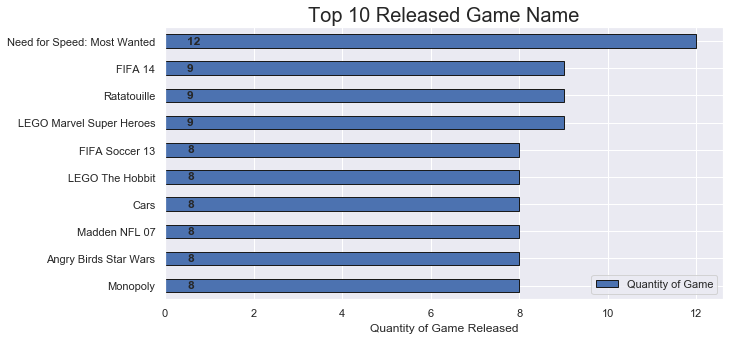

In [112]:
df['Name'].value_counts().head(10)[::-1].plot(kind='barh',figsize=(10,5),edgecolor='k')
plt.title('Top 10 Released Game Name',size=20)
plt.xlabel('Quantity of Game Released')
for i in range(0,10):
    plt.text(0.5,i-0.1,name[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

_Terdapat 11325 nama game yang unique dari jumlah 16291 game dalam dataframe. Game yang paling banyak dirilis dengan nama game yang sama adalah:_
1. Need for Speed : Most Wanted  
2. LEGO Marvel Super Heroes  
3. Ratatouille 
4. FIFA 14  
5. Terraria  
6. LEGO Jurrassic World
7. Madden NFL 08
8. Lego Batman 3: Beyond Gotham
9. The LEGO Movie Videogame
10. Madden NFL 07

#### Platform Column

In [113]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [114]:
len(df['Platform'].unique())

31

In [115]:
platform = df['Platform'].value_counts().head(10)[::-1]

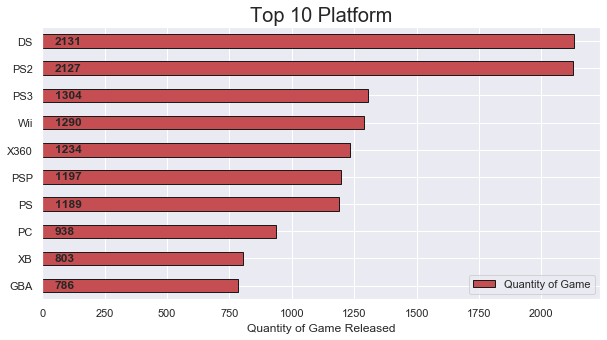

In [116]:
df['Platform'].value_counts().head(10)[::-1].plot(kind='barh',figsize=(10,5),color='r',edgecolor='k')
plt.title('Top 10 Platform',size = 20)
plt.xlabel('Quantity of Game Released')
for i in range(0,10):
    plt.text(50,i-0.1,platform[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

Dari total 31 Platform, Top 10 platform yang paling banyak dipilih oleh publisher untuk merilis game adalah:
1. DS  = 2131 pcs
2. PS2  = 2127 pcs
3. PS3  = 1304 pcs
4. Wii  = 1290 pcs
5. Xbox 360  = 1234 pcs
6. PSP  = 1197 pcs
7. PS  = 1189 pcs
8. PC  = 938 pcs
9. Xbox  = 803 pcs
10. Gameboy Advance  = 786 pcs

#### Genre Column

In [117]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [118]:
len(df['Genre'].unique())

12

In [119]:
genre = df['Genre'].value_counts()[::-1]

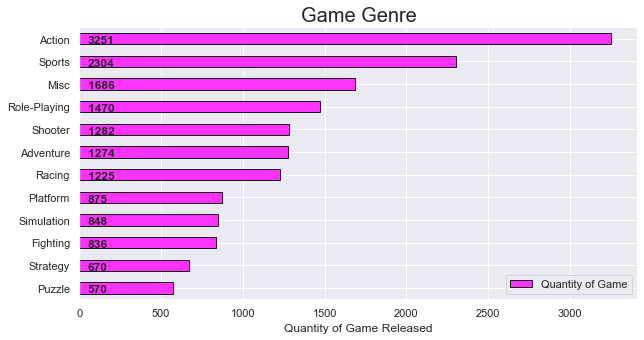

In [120]:
df['Genre'].value_counts()[::-1].plot(kind='barh',figsize=(10,5),color='#FF33FF',edgecolor='k')
plt.title('Game Genre',size = 20)
plt.xlabel('Quantity of Game Released')
for i in range(0,12):
    plt.text(50,i-0.2,genre[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

Dari total 12 Genre, susunan genre game dari yang terbanyak diproduksi adalah:
1. Action = 3251 pcs
2. Sports = 2304 pcs
3. Misc = 1686 pcs
4. Role-Playing = 1470 pcs
5. Shooter = 1282 pcs
6. Adventure = 1274 pcs
7. Racing = 1225 pcs
8. Platform = 875 pcs
9. Simulation = 848 pcs
10. Fighting = 836 pcs
11. Strategy = 670 pcs
12. Puzzle = 570 pcs

#### Publisher Column

In [121]:
len(df['Publisher'].unique())

576

In [122]:
publisher = df['Publisher'].value_counts().head(10)[::-1]

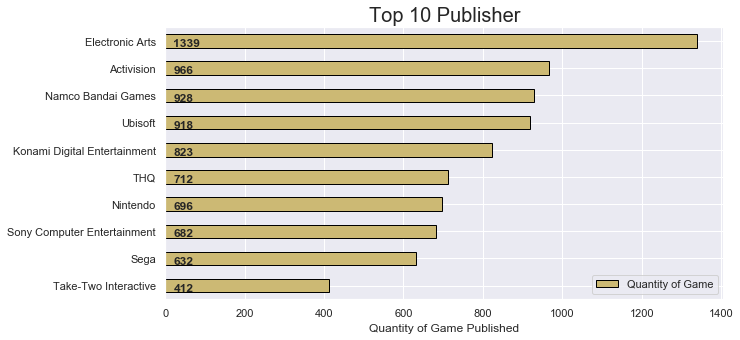

In [123]:
df['Publisher'].value_counts().head(10)[::-1].plot(kind='barh',figsize=(10,5),color='y',edgecolor='black')
plt.title('Top 10 Publisher',size = 20)
plt.xlabel('Quantity of Game Published')
for i in range(0,10):
    plt.text(20,i-0.2,publisher[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()
# Top 10 publisher with the most game published

Dari total 576 Publisher, Publisher yang paling banyak memproduksi game adalah:
1. Electronic Arts = 1339 pcs
2. Activision = 966 pcs
3. Namco Bandai Games = 928 pcs
4. Ubisoft = 918 pcs
5. Konami Digital Entertainment = 823 pcs
6. THQ = 712 pcs
7. Nintendo = 696 pcs
8. Sony Computer Entertainmet=nt = 682 pcs
9. Sega = 632 pcs
10. Take-Two Interactive = 412 pcs

In [124]:
x=list(df['Year'].unique())
x.sort()
x

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [125]:
len(df['Year'].unique())

39

In [126]:
year = df['Year'].value_counts().head(10)[::-1]
year = list(year)

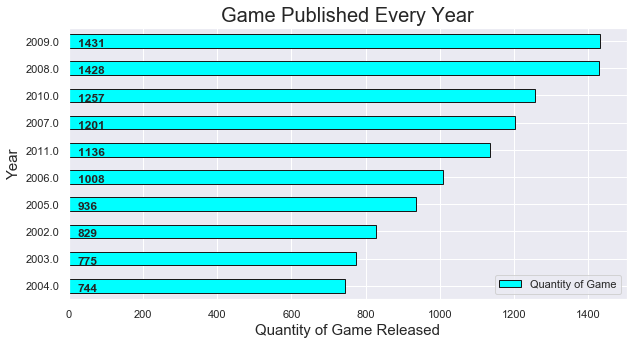

In [127]:
df['Year'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='cyan',edgecolor='k')
plt.title('Game Published Every Year',size=20)
plt.ylabel('Year',size = 15)
plt.xlabel('Quantity of Game Released',size = 15)
for i in range(0,10):
    plt.text(25,i-0.2,year[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

Dari total 39 interval tahun produksi game, Top 10 interval tahun game paling banyak dirilis adalah:
1. 2009 = 1431 pcs
2. 2008 = 1428 pcs
3. 2010 = 1257 pcs
4. 2007 = 1201 pcs
5. 2011 = 1136 pcs
6. 2006 = 1008 pcs
7. 2005 = 936 pcs
8. 2002 = 829 pcs
9. 2003 = 775 pcs
10. 2004 = 744 pcs

Dapat dilihat juga bahwa tahun 2018 dan 2019 tidak ada dalam data

In [128]:
year2 = df['Year'].value_counts().sort_index()
year2 = list(year2)

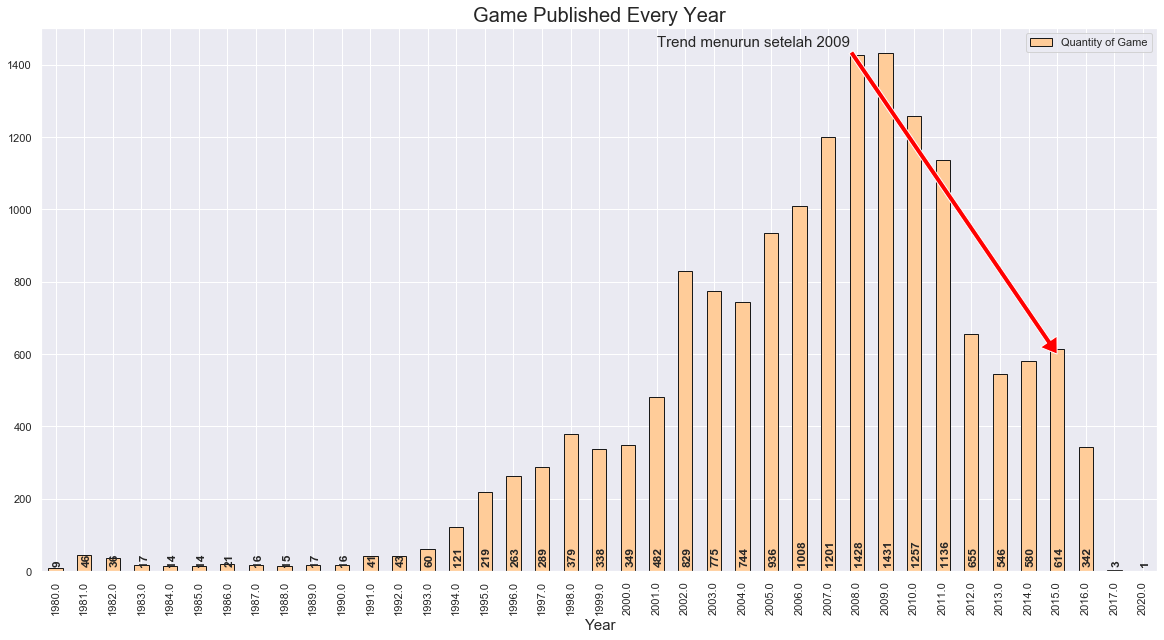

In [129]:
df['Year'].value_counts().sort_index().plot(kind='bar',figsize=(20,10),color='#FFCC99',edgecolor='k')
plt.title('Game Published Every Year',size=20)
plt.xlabel('Year',size = 15)
for i in range(0,39):
    plt.text(i-0.1,20,year2[i],fontweight='bold',rotation=90)
plt.annotate('Trend menurun setelah 2009',xy=(35,600), xytext=(21,1450),size=15,
            arrowprops = {
                'facecolor':'red',
                'shrink':0,
                'width':5,
                'headwidth':20,
                'headlength':15
            })
plt.legend(['Quantity of Game'])
plt.show()

In [130]:
df['Year'].value_counts().max()

1431

Puncak produksi game ada pada tahun 2009 sebanyak 1431 game, setelah tahun tersebut trend rilis game turun dan belum pernah menyentuh angka pada tahun 2009 lagi.

#### NA_Sales Column

In [131]:
df['NA_Sales'].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

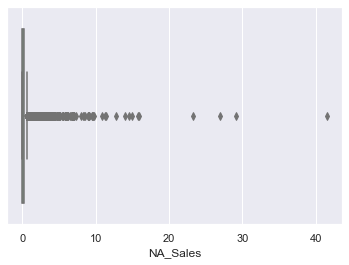

In [132]:
sns.boxplot(df['NA_Sales'], palette='rainbow')
plt.show()

Dapat dilihat bahwa sebagian besar NA_Sales untuk sebuah game ada di <20 ribu copy (akan dijelaskan di bagian selanjutnya)

In [133]:
df['NA_Sales'].sum()

4327.650000000001

In [134]:
df['NA_Sales'].mean()

0.2656466760788366

In [135]:
df['NA_Sales'].value_counts(normalize=True)[::-1].tail(10)

0.09    0.025106
0.08    0.027684
0.07    0.028973
0.06    0.029526
0.04    0.031919
0.05    0.031981
0.01    0.032165
0.03    0.032226
0.02    0.032902
0.00    0.271929
Name: NA_Sales, dtype: float64

Diatas merupakan data per-million copies dan persentasenya dari keselurahan data dalam bentuk desimal

In [136]:
na_sales=df['NA_Sales'].value_counts()[::-1].tail(10)
na_sales=list(na_sales)

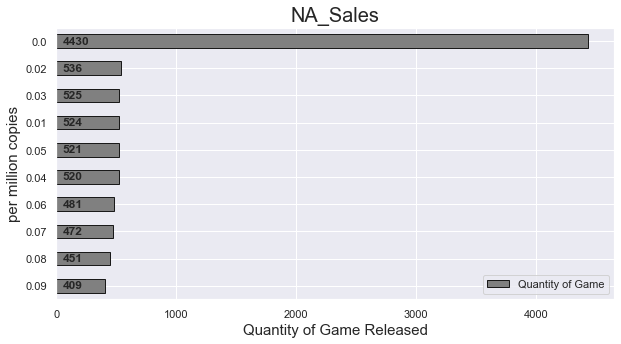

In [137]:
df['NA_Sales'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='grey',edgecolor='k')
plt.title('NA_Sales',size=20)
plt.ylabel('per million copies',size = 15)
plt.xlabel('Quantity of Game Released',size = 15)
for i in range(0,10):
    plt.text(50,i-0.1,na_sales[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

Terdapat 4430 judul game yang mempunyai penjualan di North America < 20 ribu copy atau 27.19% dari keseluruhan data

In [138]:
rankna=df.sort_values(['NA_Sales','Name']).tail(10)[::-1]
rankna

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


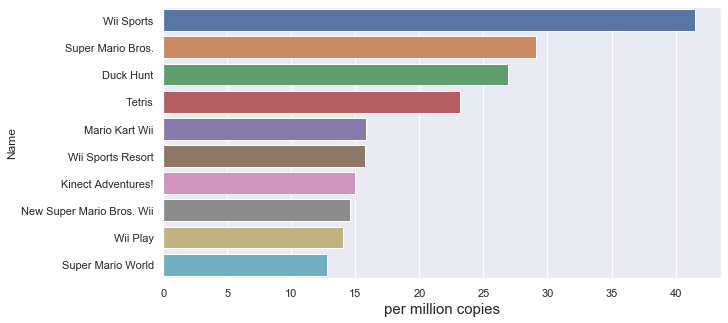

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(rankna['NA_Sales'],rankna['Name'])
plt.xlabel('per million copies',size=15)
plt.show()

Top 10 game paling sukses dalam penjualan di region North America adalah:
1. Wii Sports = 41.49 million copies
2. Super Mario Bros. = 29.08 million copies
3. Duck Hunt = 26.93 million copies
4. Tetris = 23.2 million copies
5. Mario Kart Wii = 15.85 million copies
6. Wii Sports Resort = 15.75 million copies
7. Kinect Adventures! = 14.97 million copies
8. New Super Mario Bros. Wii = 14.59 million copies
9. Wii Play = 14.03 million copies
10. Super Mario World = 12.78 million copies


#### EU_Sales Column

In [140]:
df['EU_Sales'].describe()

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

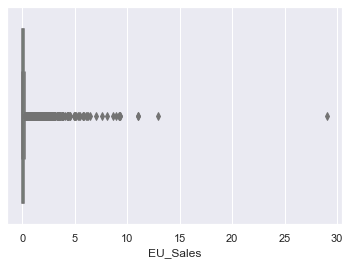

In [141]:
sns.boxplot(df['EU_Sales'], palette='rainbow')
plt.show()

Dapat dilihat bahwa sebagian besar EU_Sales untuk sebuah game ada di <10 ribu copy (akan dijelaskan di bagian selanjutnya)

In [142]:
df['EU_Sales'].sum()

2406.69

In [143]:
df['EU_Sales'].value_counts(normalize=True)[::-1].tail(10)

0.09    0.015530
0.08    0.018354
0.07    0.022957
0.06    0.024431
0.05    0.032902
0.04    0.045178
0.03    0.056227
0.02    0.076607
0.01    0.089866
0.00    0.345221
Name: EU_Sales, dtype: float64

In [144]:
eu_sales=df['EU_Sales'].value_counts()[::-1].tail(10)
eu_sales=list(eu_sales)

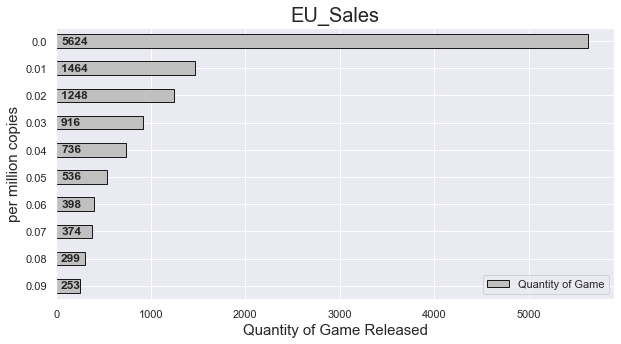

In [145]:
df['EU_Sales'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='silver',edgecolor='k')
plt.title('EU_Sales',size=20)
plt.ylabel('per million copies',size = 15)
plt.xlabel('Quantity of Game Released',size = 15)
plt.legend(['Quantity of Game'])
for i in range(0,10):
    plt.text(50,i-0.1,eu_sales[i],fontweight='bold')
plt.show()

Terdapat 5624 judul game yang mempunyai penjualan di Eropa  < 10 ribu copy atau 34.5% dari keseluruhan data

In [146]:
rankeu=df.sort_values(['EU_Sales','Name']).tail(10)[::-1]
rankeu

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


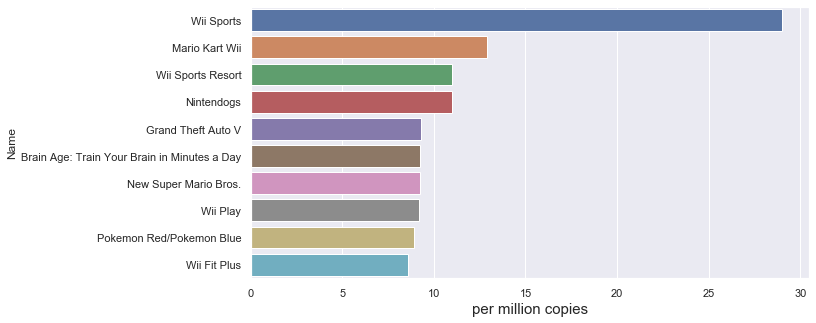

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(rankeu['EU_Sales'],rankeu['Name'])
plt.xlabel('per million copies',size=15)
plt.show()

Top 10 game paling sukses dalam penjualan di region Eropa adalah:
1. Wii Sports = 29.02 million copies
2. Mario Kart Wii = 12.88 million copies
3. Wii Sports Resort = 11.01 million copies
4. Nintendogs = 11 million copies
5. Grand Theft Auto V = 9.27 million copies
6. Brain Age:Train Your Brain in Minutes a Day = 9.26 million copies
7. New Super Mario Bros = 9.23 million copies
8. Wii Play = 9.20 million copies
9. Pokemon Red/Pokemon Blue = 8.89 million copies
10. Wii Fit Plus = 8.59 million copies

#### JP_Sales Column

In [148]:
df['JP_Sales'].describe()

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

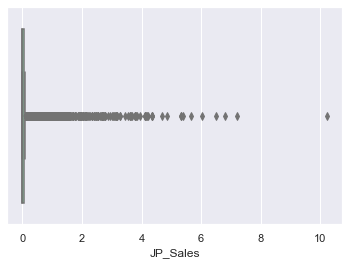

In [149]:
sns.boxplot(df['JP_Sales'], palette='rainbow')
plt.show()

Dapat dilihat bahwa sebagian besar JP_Sales untuk sebuah game ada di <10 ribu copy (akan dijelaskan di bagian selanjutnya)

In [150]:
df['JP_Sales'].value_counts(normalize=True)[::-1].tail(10)

0.09    0.009453
0.08    0.012891
0.07    0.014057
0.06    0.017678
0.05    0.019643
0.04    0.024001
0.03    0.032104
0.01    0.042600
0.02    0.044073
0.00    0.626542
Name: JP_Sales, dtype: float64

In [151]:
jp_sales=df['JP_Sales'].value_counts()[::-1].tail(10)
jp_sales=list(jp_sales)

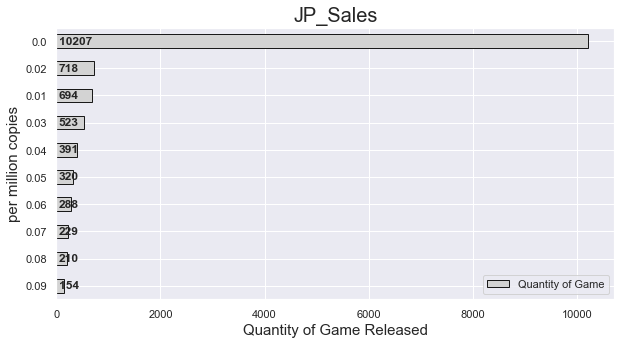

In [152]:
df['JP_Sales'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='lightgrey',edgecolor='k')
plt.title('JP_Sales',size=20)
plt.ylabel('per million copies',size = 15)
plt.xlabel('Quantity of Game Released',size = 15)
for i in range(0,10):
    plt.text(50,i-0.1,jp_sales[i],fontweight='bold')
plt.legend(['Quantity of Game'])
plt.show()

Terdapat 10207 judul game yang mempunyai penjualan di Jepang  < 10 ribu copy atau 62.6% dari keseluruhan data

In [153]:
rankjp=df.sort_values(['JP_Sales','Name']).tail(10)[::-1]
rankjp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


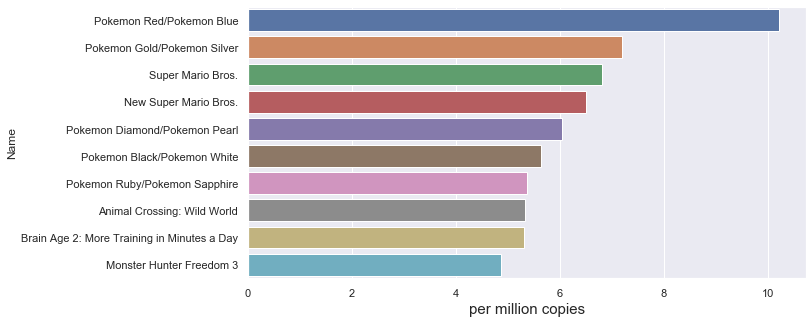

In [154]:
plt.figure(figsize=(10,5))
sns.barplot(rankjp['JP_Sales'],rankjp['Name'])
plt.xlabel('per million copies',size=15)
plt.show()

Top 10 game paling sukses dalam penjualan di region Jepang adalah:
1. Pokemon Red/Pokemon Blue = 10.2 million copies
2. Pokemon Gold/Pokemon Silver = 7.2 million copies
3. Super Mario Bros. = 6.81 million copies
4. New Super Mario Bros. = 6.5 million copies
5. Pokemon Diamond/Pokemon Pearl = 6.04 million copies
6. Pokemon Black/Pokemon White = 5.65 million copies
7. Pokemon Ruby/Pokemon Sapphire = 5.38 million copies
8. Animal Crossing:Wild World = 5.33 million copies
9. Brain Age 2:More Training in Minutes a Day = 5.32 million copies
10. Monster Hunter Freedom 3 = 4.87 million copies

#### Other_Sales Column

In [155]:
df['Other_Sales'].describe()

count    16291.000000
mean         0.048426
std          0.190083
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

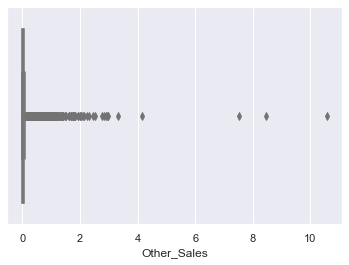

In [156]:
sns.boxplot(df['Other_Sales'], palette='rainbow')
plt.show()

Dapat dilihat bahwa sebagian besar Other_Sales (Region selain NA,JP,dan EU) untuk sebuah game ada di <10 ribu copy (akan dijelaskan di bagian selanjutnya)

In [157]:
other_sales=df['Other_Sales'].value_counts()[::-1].tail(10)
other_sales=list(other_sales)

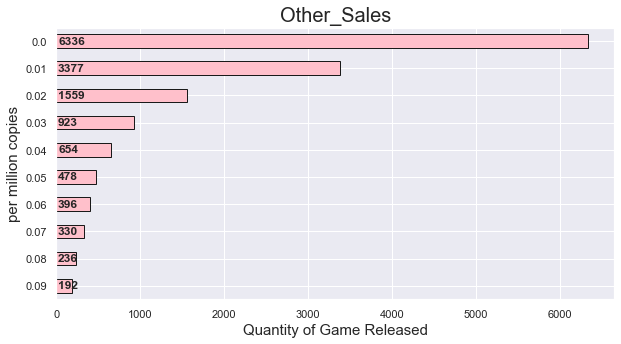

In [158]:
df['Other_Sales'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='pink',edgecolor='k')
plt.title('Other_Sales',size=20)
plt.ylabel('per million copies',size = 15)
for i in range(0,10):
    plt.text(20,i-0.1,other_sales[i],fontweight='bold')
plt.xlabel('Quantity of Game Released',size = 15)
plt.show()

Terdapat 1045 judul game yang mempunyai penjualan di seluruh bagian dunia kecuali NA,EU,JP  < 10 ribu copy atau 38.8% dari keseluruhan data

In [159]:
rankother=df.sort_values(['Other_Sales','Name']).tail(10)[::-1]
rankother

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


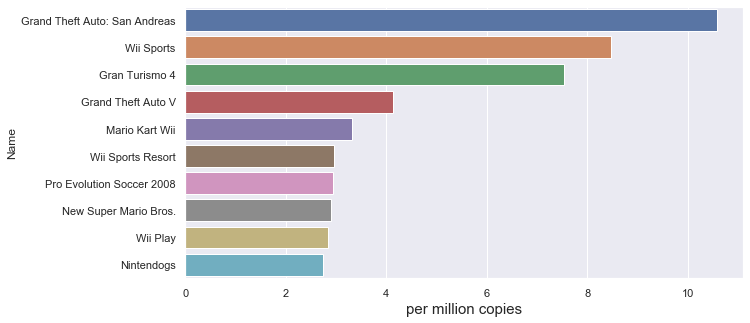

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(rankother['Other_Sales'],rankother['Name'])
plt.xlabel('per million copies',size=15)
plt.show()

Top 10 game paling sukses dalam penjualan di region selain NA,EU,JP adalah:
1. GTA San Andreas = 10.57 million copies
2. Wii Sports = 8.46 million copies
3. Gran Turismo 4 = 7.53 million copies
4. Gran Turismo V = 4.14 million copies
5. Mario Kart Wii = 3.31 million copies
6. Wii Sports Resort = 2.96 million copies
7. Pro Evolution Soccer 2008 = 2.93 million copies
8. New Super Mario Bros. = 2.90 million copies
9. Wii Play = 2.85 million copies
10. Nintendogs = 2.75 million copies

#### Global_Sales Column

In [161]:
df['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

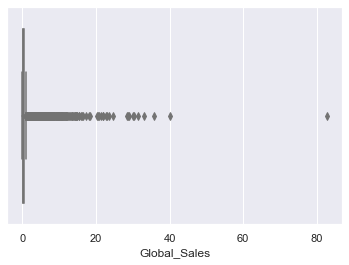

In [162]:
sns.boxplot(df['Global_Sales'], palette='rainbow')
plt.show()

In [163]:
df['Global_Sales'].value_counts(normalize=True)[::-1].tail(10)

0.11    0.025597
0.09    0.026272
0.08    0.029157
0.07    0.030508
0.06    0.034866
0.01    0.036830
0.05    0.038303
0.04    0.038917
0.03    0.048800
0.02    0.064146
Name: Global_Sales, dtype: float64

In [164]:
global_sales=df['Global_Sales'].value_counts()[::-1].tail(10)
global_sales=list(global_sales)

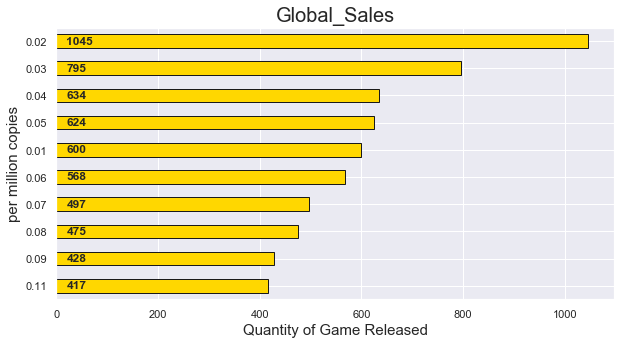

In [165]:
df['Global_Sales'].value_counts()[::-1].tail(10).plot(kind='barh',figsize=(10,5),color='gold',edgecolor='k')
plt.title('Global_Sales',size=20)
plt.ylabel('per million copies',size = 15)
for i in range(0,10):
    plt.text(20,i-0.1,global_sales[i],fontweight='bold')
plt.xlabel('Quantity of Game Released',size = 15)
plt.show()

Terdapat 1045 judul game yang mempunyai penjualan di seluruh bagian dunia < 10 ribu copy atau 6.4% dari keseluruhan data

In [166]:
rankglobal=df.sort_values(['Global_Sales','Name']).tail(10)[::-1]
rankglobal

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


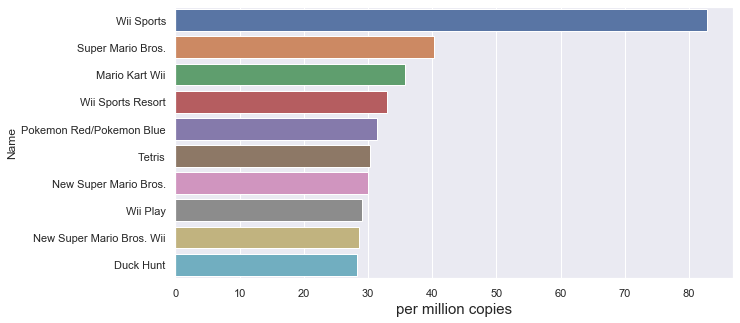

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(rankglobal['Global_Sales'],rankglobal['Name'])
plt.xlabel('per million copies',size=15)
plt.show()

Top 10 game paling sukses dalam penjualan di dunia adalah:
1. Wii Sports = 82.74 million copies
2. Super Mario Bros = 40.24 million copies
3. Mario Kart Wii = 35.82 million copies
4. Wii Sports Resort = 33 million copies
5. Pokemon Red/Pokemon Blue = 31.37 million copies
6. Tetris = 30.26 million copies
7. New Super Mario Bros = 30.01 million copies
8. Wii Play = 29.02 million copies
9. New Super Mario Bros Wii. = 28.62 million copies
10. Duck Hunt = 28.31 million copies

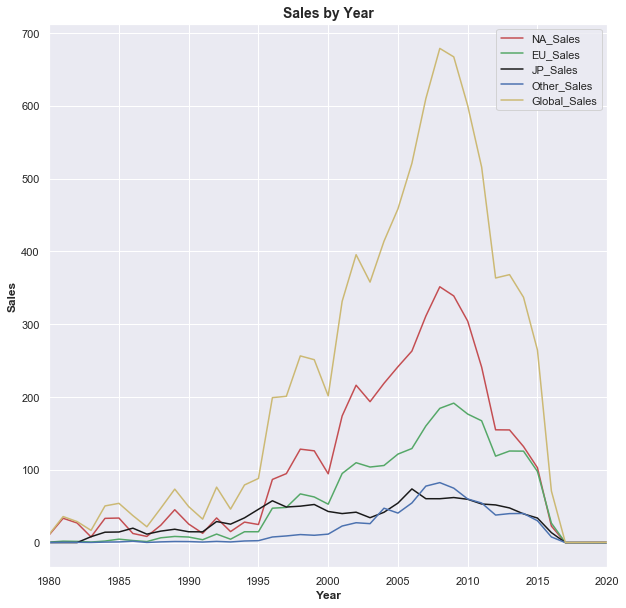

In [168]:
plt.figure(figsize=(10,10))
df.groupby('Year')['NA_Sales'].sum().plot(kind='line',color='r')
df.groupby('Year')['EU_Sales'].sum().plot(kind='line',color='g')
df.groupby('Year')['JP_Sales'].sum().plot(kind='line',color='k')
df.groupby('Year')['Other_Sales'].sum().plot(kind='line',color='b')
df.groupby('Year')['Global_Sales'].sum().plot(kind='line',color='y')
plt.grid(True)
plt.xlabel('Year', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('Sales by Year', fontweight = 'bold', fontsize = 14)
plt.legend(['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
plt.show()

Dapat dilihat pada grafik diatas, dimana penjualan tertinggi ada di region North America, diikuti Eropa, Jepang, dan Other.<br>
Sales Gobal merupakan gabungan dari penjualan game di semua region pertahunnya

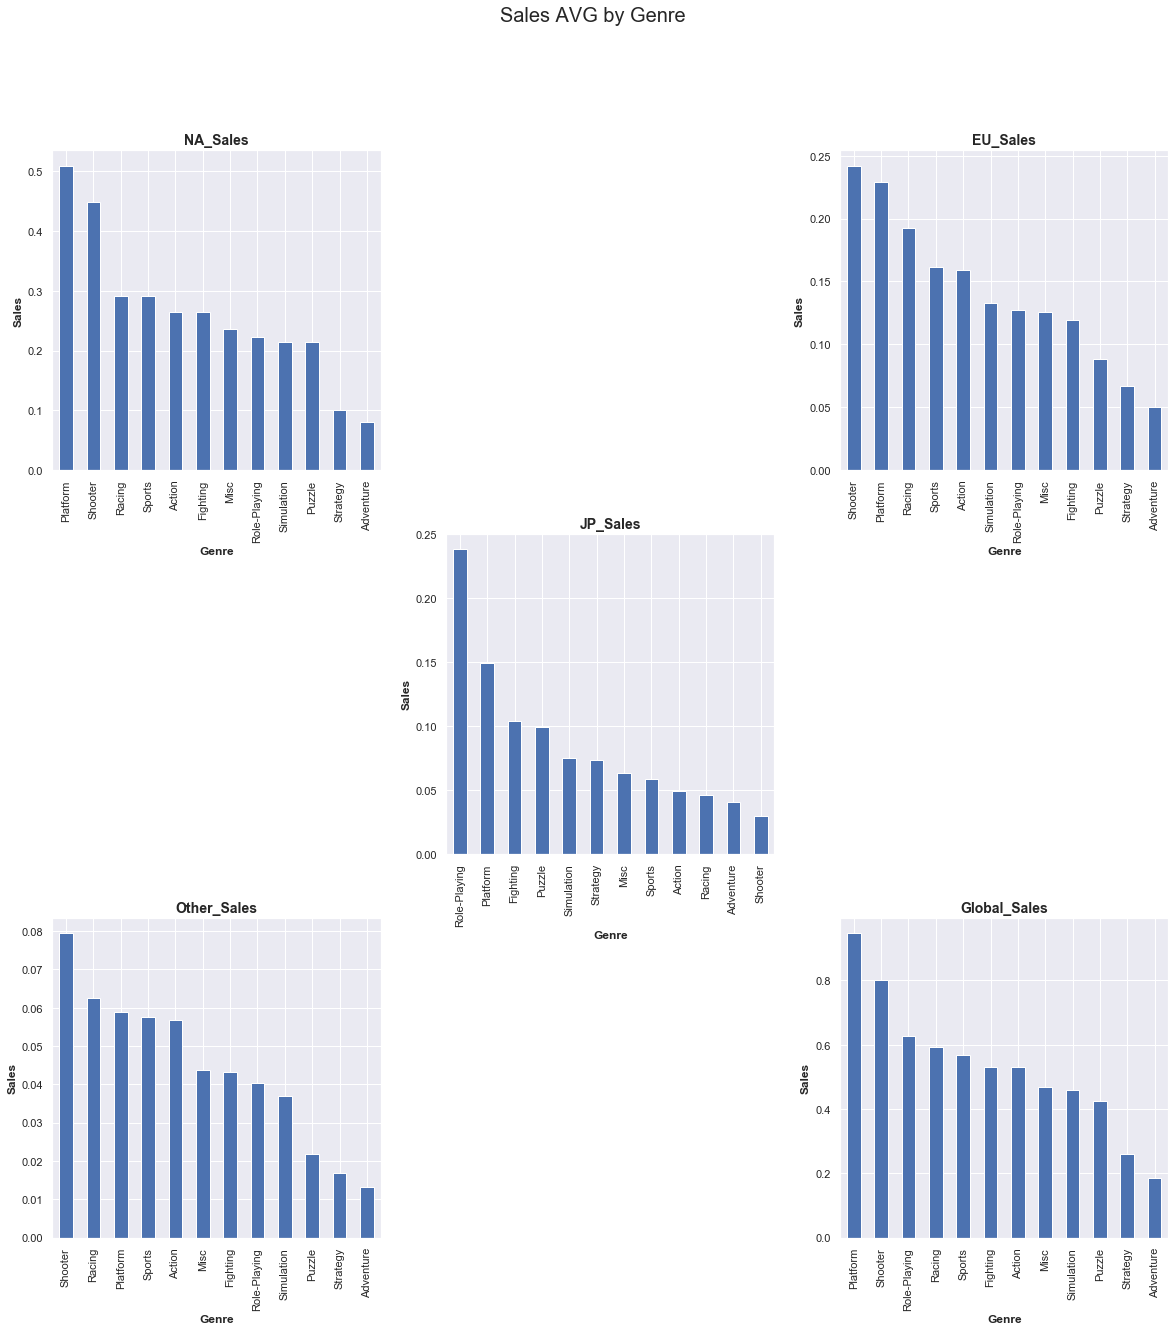

In [169]:
plt.figure(figsize=(20,20))
plt.subplot(331)
df.groupby('Genre')['NA_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Genre', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('NA_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(333)
df.groupby('Genre')['EU_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Genre', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('EU_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(335)
df.groupby('Genre')['JP_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Genre', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('JP_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(337)
df.groupby('Genre')['Other_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Genre', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('Other_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(339)
df.groupby('Genre')['Global_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Genre', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('Global_Sales', fontweight = 'bold', fontsize = 14)

plt.suptitle('Sales AVG by Genre',size=20)
plt.show()


Genre yang paling berhasil dalam penjualan adalah : 
- North America : Platform
- Europe : Shooter
- Japan : Role-Playing
- Other : Shooter
- Global : Platform

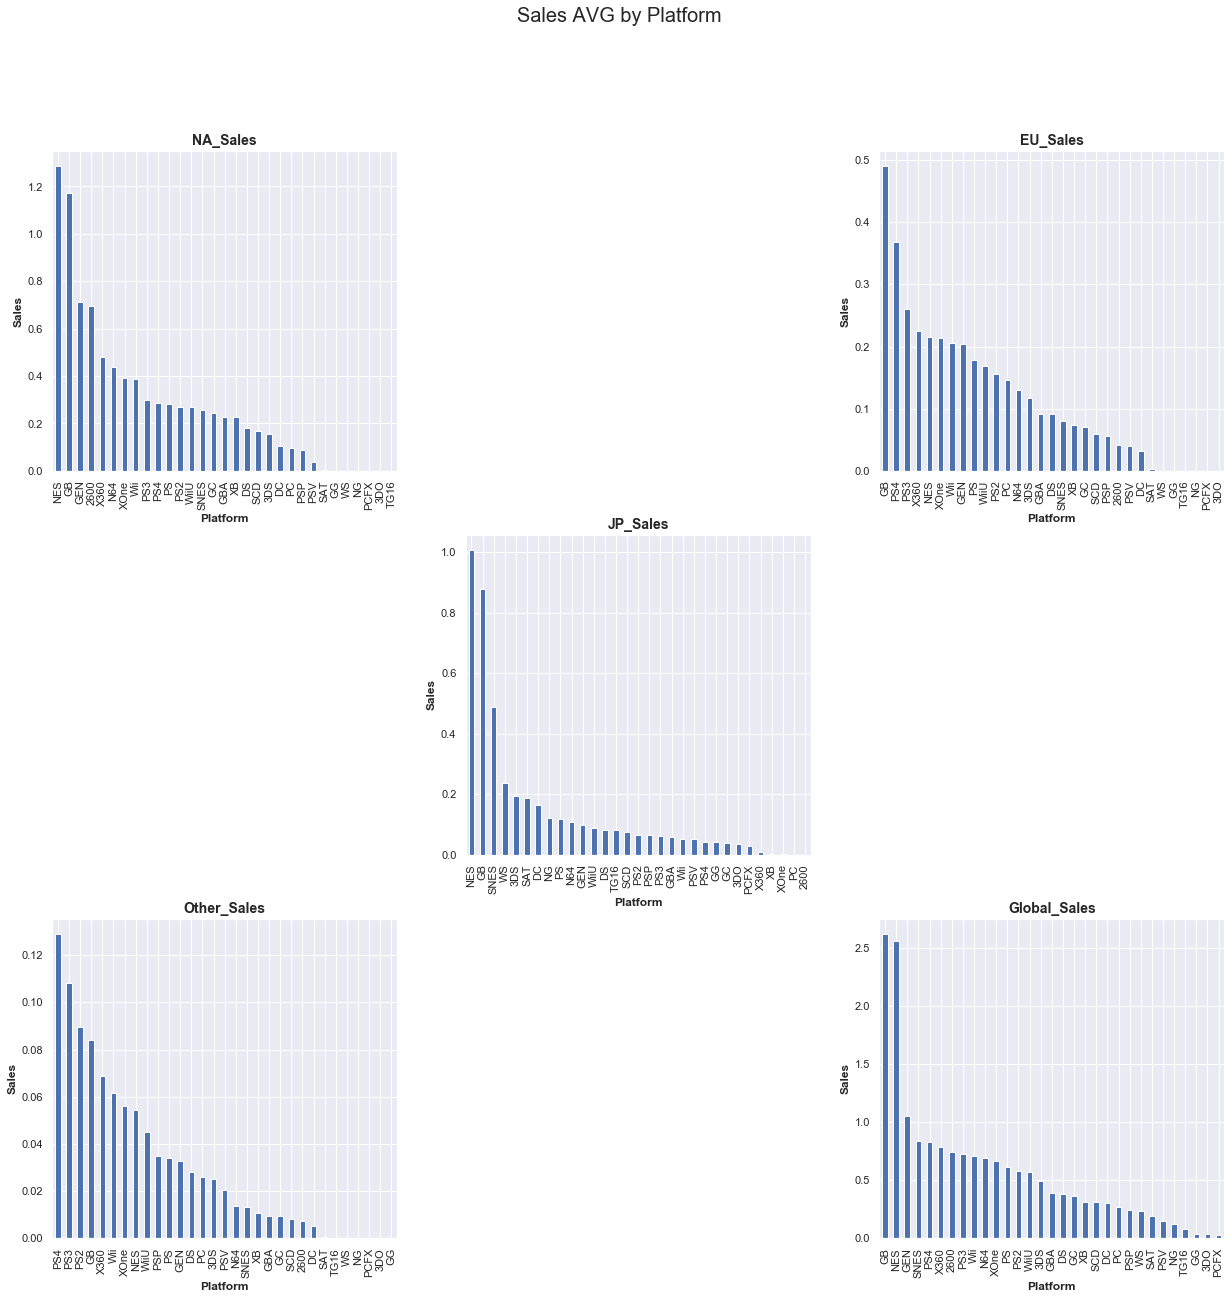

In [170]:
plt.figure(figsize=(21,20))
plt.subplot(331)
df.groupby('Platform')['NA_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Platform', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('NA_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(333)
df.groupby('Platform')['EU_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Platform', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('EU_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(335)
df.groupby('Platform')['JP_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Platform', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('JP_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(337)
df.groupby('Platform')['Other_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Platform', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('Other_Sales', fontweight = 'bold', fontsize = 14)

plt.subplot(339)
df.groupby('Platform')['Global_Sales'].mean().sort_values()[::-1].plot(kind='bar')
plt.grid(True)
plt.xlabel('Platform', fontweight = 'bold', fontsize = 12)
plt.ylabel('Sales', fontweight = 'bold', fontsize = 12)
plt.title('Global_Sales', fontweight = 'bold', fontsize = 14)

plt.suptitle('Sales AVG by Platform',size=20)
plt.show()


Platform yang paling berhasil dalam penjualan adalah : 
- North America : NES
- Europe : GameBoy
- Japan : NES
- Other : PS4
- Global : GameBoy

In [171]:
df_platform_genre = df.groupby(['Platform','Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()
df_platform_genre

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Genre                                                                
2600     Action        0.447818  0.026727  0.000000     0.003818      0.479818
         Adventure     0.380000  0.020000  0.000000     0.000000      0.400000
         Fighting      0.720000  0.040000  0.000000     0.010000      0.770000
         Misc          0.668000  0.040000  0.000000     0.006000      0.716000
         Platform      1.375556  0.080000  0.000000     0.017778      1.474444
...                         ...       ...       ...          ...           ...
XOne     Role-Playing  0.427692  0.235385  0.000769     0.063846      0.729231
         Shooter       0.963030  0.462727  0.004848     0.132727      1.563939
         Simulation    0.093333  0.070000  0.000000     0.016667      0.180000
         Sports        0.396111  0.213056  0.000556     0.056389      0.665833
         Strategy      0.086667  0.033333  0.000000     0.010000      0.126667

[293 rows x 5 columns]

In [172]:
df_platform_genre[df_platform_genre['NA_Sales']==df_platform_genre['NA_Sales'].max()]

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,Genre,,,,,
NES,Shooter,4.147143,0.161429,0.705714,0.074286,5.088571


Penjualan game dengan rata-rata tertinggi untuk di North Amerika adalah game dengan genre Shooter dari konsol NES

In [173]:
df_platform_genre[df_platform_genre['EU_Sales']==df_platform_genre['EU_Sales'].max()]

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,Genre,,,,,
GB,Role-Playing,1.367143,1.031905,1.645238,0.157619,4.201905


Penjualan game dengan rata-rata tertinggi untuk di Europe adalah game dengan genre Role-Play dari konsol GB

In [174]:
df_platform_genre[df_platform_genre['JP_Sales']==df_platform_genre['JP_Sales'].max()]

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,Genre,,,,,
NES,Misc,0.005,0.0,1.79,0.0,1.795


Penjualan game dengan rata-rata tertinggi untuk di Japan adalah game dengan genre Misc dari konsol NES

In [175]:
df_platform_genre[df_platform_genre['Other_Sales']==df_platform_genre['Other_Sales'].max()]

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,Genre,,,,,
PS4,Shooter,0.824118,0.975,0.068529,0.347647,2.215294


Penjualan game dengan rata-rata tertinggi untuk di daerah lain adalah game dengan genre Shooter dari konsol PS4

In [176]:
df_platform_genre[df_platform_genre['Global_Sales']==df_platform_genre['Global_Sales'].max()]

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,Genre,,,,,
NES,Shooter,4.147143,0.161429,0.705714,0.074286,5.088571


Secara global game dengan rata-rata penjualan tertinggi adalah game dengan genre Shooter dari konsol NES

Text(0.5, 1.0, 'NA_Sales')

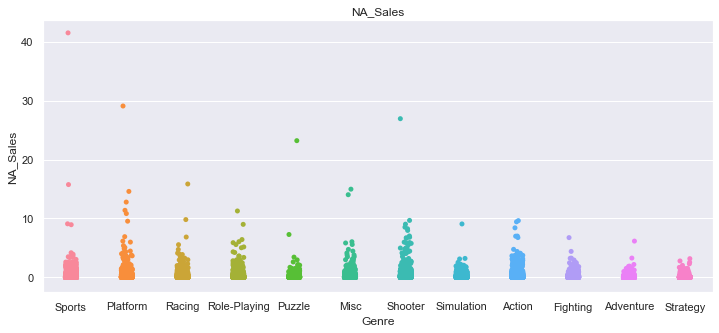

In [177]:
plt.subplots(figsize=(12,5))
sns.stripplot(x='Genre',y='NA_Sales',data=df)
plt.title('NA_Sales')

Text(0.5, 1.0, 'EU_Sales')

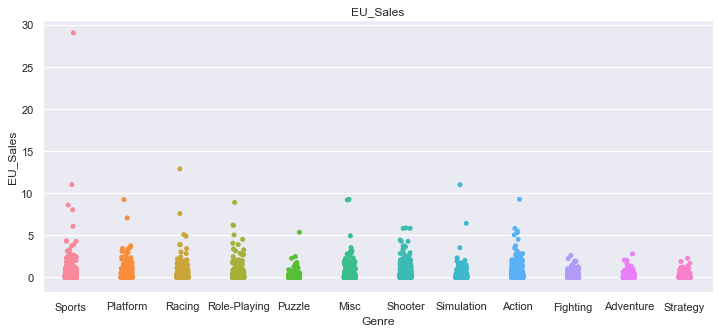

In [178]:
plt.subplots(figsize=(12,5))
sns.stripplot(x='Genre',y='EU_Sales',data=df)
plt.title('EU_Sales')

Text(0.5, 1.0, 'JP_Sales')

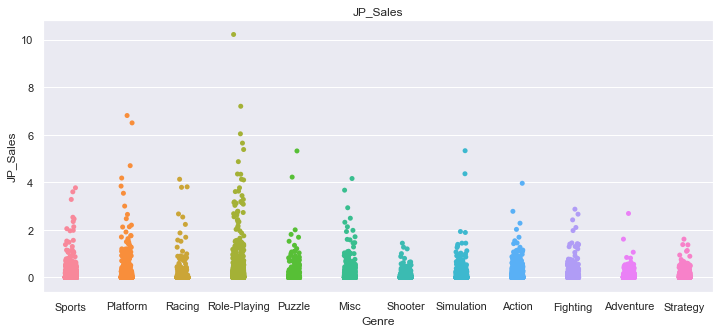

In [179]:
plt.subplots(figsize=(12,5))
sns.stripplot(x='Genre',y='JP_Sales',data=df)
plt.title('JP_Sales')

Text(0.5, 1.0, 'Other_Sales')

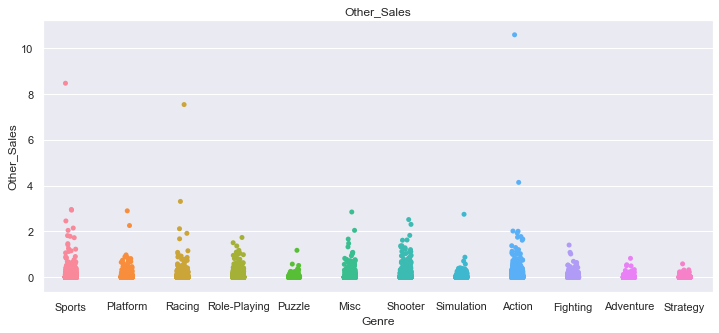

In [180]:
plt.subplots(figsize=(12,5))
sns.stripplot(x='Genre',y='Other_Sales',data=df)
plt.title('Other_Sales')

Text(0.5, 1.0, 'Global_Sales')

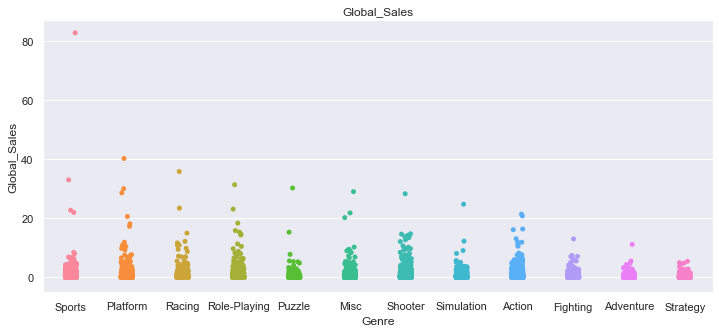

In [181]:
plt.subplots(figsize=(12,5))
sns.stripplot(x='Genre',y='Global_Sales',data=df)
plt.title('Global_Sales')

In [182]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


### Sales Comparison by Genre

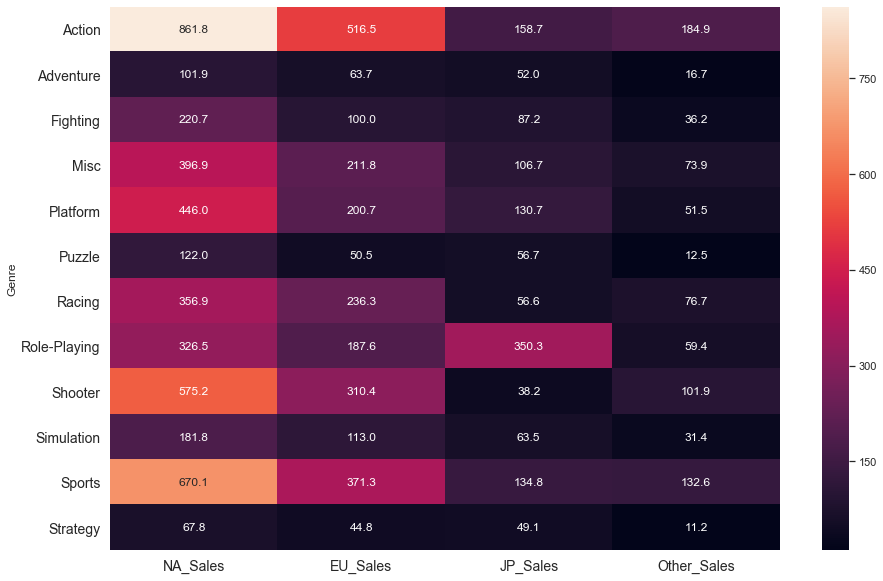

In [183]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f').set_ylim(12,0)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### The most sold games in single year by genre

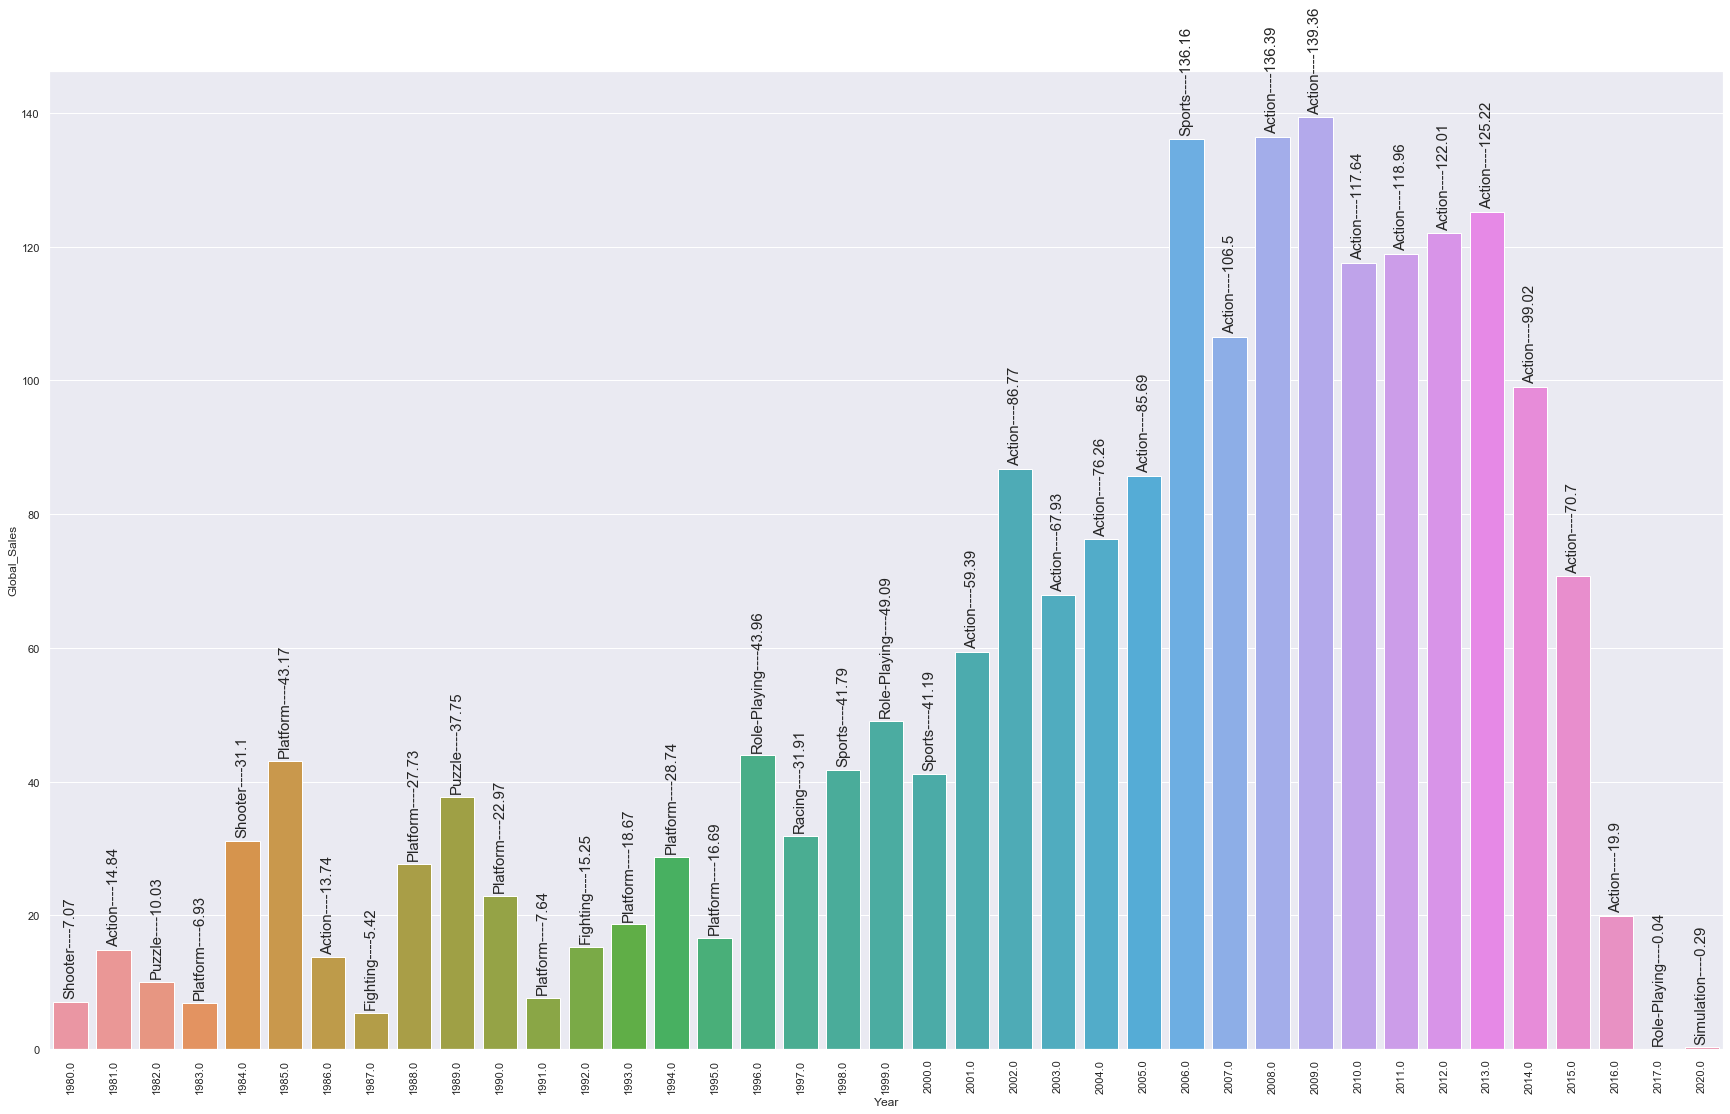

In [184]:
year_sale_df = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_df.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_df['Global_Sales']
year_sale_max = year_sale_df[year_sale].reset_index(drop=True)
# year_sale_max
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), size=15, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

### Analysis


Grafik data di atas menunjukan persentasi penjualan game berdasarkan genre di tiap region memiliki perbedaan. Contohnya pada region Jepang genre yang memiliki tingkat penjualan paling bagus adalah genre role-playing (RPG) dan contoh game yang memiliki penjualan tinggi adalah  Pokemon red/ pokemon blue = 10.2 million copies,Pokemon Gold/Pokemon Silver = 7.2 million copies, Super Mario Bros. = 6.81 million copies. Ada beberapa faktor yang menyebabkan game pokemon dan Super Mario menjadi sangat terkenal dan memiliki tingkat penjualan tinggi di pasar jepang, pertama Pokemon  dan Super Mario adalah salah satu dari ikon animasi Jepang yang juga menjadi ikon budaya populer Jepang. Kedua, budaya Jepang dapat dilihat unsur-unsurnya dalam video games. Beberapa elemen dari budaya populer Jepang yang dapat dilihat dalam video game mencakup anime, cosplay, gaya busana harajuku, manga, kesenian Jepang, fashion Jepang, dan sebagainya. 

Sebaliknya dengan region lainnya penjualan game dengan genre action, shooter, dan sport memiliki tingkat penjualan paling rendah di pasar japang, hal ini juga disebabkan oleh beberapa faktor dari para gamer di region jepang. Pertama, para gamer di Jepang lebih menyukai game yang berbasis JRPG (Japanese Role Playing Games) sedikit berbeda dengan game role-playing buatan amerika / eropa, JRPG menawarkan gameplay yang lebih santai dibandingkan dengan RPG biasa contohnya pada sistem pertarungan JRPG menggunakan istilah sistem turn-based, yang berarti pemain dan musuh yang dihadapi akan saling menyerang secara bergantian. Mekanisme permainan dalam RPG barat didesain penuh dengan aktivitas sampingan yang memberikan EXP ataupun equipment baru untuk mengembangkan karakter, dan aktivitas-aktivitas tersebut terkadang secara tidak langsung juga memperkaya cerita utama dalam permainan, bahkan beberapa diantaranya dapat mempengaruhi ending dari game itu sendiri. JRPG dengan kecenderungan ceritanya yang linear juga secara tidak langsung menghadirkan latar tempat yang lebih kecil seperti dungeon, kota ataupun tempat-tempat lainnya dengan aksesibilitas yang terbatas. Aktivitas sampingan dalam JRPG cenderung menjadi terbatas dalam menghadirkan backstory dan lebih fokus dalam memberikan reward yang bermanfaat untuk mengembangkan sang karakter. Hal ini juga membuat game-game JRPG terkesan perlu melakukan grinding untuk memperkuat karakternya. Kedua, pemain dari region jepang kebanyakan adalah type pemain achiever, yakni mereka yang bermain untuk mencapai sasaran- sasaran tertentu dan meningkatkan kemampuan mereka didalam game tersebut dan explorers, yakni mereka yang suka menjelajah dan menyelidiki dunia permainan. (Craig, 2000)

Berbeda dengan Region Jepang, region Europe, North America, dan Other memiliki tingkat penjualan game dengan Genre Action, Shooter dan Sport yang sangat tinggi untuk tiap regionnya. Ada beberapa faktor yang menyebabkan genre game Action, Shooter, Sport, pertama , para gamer dari negara tersebut memiliki karakteristik yang berbeda dengan para gamer di region jepang, para pemain dari region EU,NA, dan Other memiliki karakteristik yang lebih beragam berdasarkan region, karakteristik para pemain dari masing-masing region ini bagi menjadi: achievers, yakni mereka yang bermain untuk mencapai sasaran- sasaran tertentu dan meningkatkan kemampuan mereka didalam game tersebut; explorers, yakni mereka yang suka menjelajah dan menyelidiki dunia permainan; socializers, yakni mereka yang suka bersosialisasi dan berhubungan dengan para pemain lain dan tidak selalu dalam konteks permainan; griefs, yakni mereka yang suka mengganggu atau menyakiti para pemain lain.Kedua, para pemain dari region Europe, North America, dan Other lebih mementingkan graphic, gameplay dan feature yang diberikan dari game bergenre tersebut.

Berdasarkan data penjualan game setiap tahun secara global game dengan genre action masih maneguasai pasar dari tahun 2001 hingga 2016 sehingga membuat game dengan genre action merupakan game dengan tingkat produtivitas tertinggi sebanyak 3251 pcs dan memiliki tingkat penjualan yang tinggi dibandingkan genre game lainnya.

Grafik data di atas menunjukan persentasi penjualan game berdasarkan platform di tiap region memiliki perbedaan tetapi secara keseluruhan penjualan platform Nintendo lebih tinggi daripada pesaing terdekatnya yaitu Sony dan Xbox, tidak hanya penjualan platform tetapi penjualan game yang memiliki basic platform nintendo memiliki rata-rata penjualan tertinggi di pasar berbagai region. Penjualan game dengan rata-rata tertinggi untuk di North Amerika adalah game dengan genre Shooter dari konsol NES, penjualan game dengan rata-rata tertinggi untuk di Europe adalah game dengan genre Role-Play dari konsol GB dan Penjualan game dengan rata-rata tertinggi untuk di Japan adalah game dengan genre Misc dari konsol NES, hal ini diperkuat dengan adanya riset yang dilakukan oleh Babb, et al (2011) Nintendo jelas merupakan pemimpin platform game selama jangka waktu penelitian 2000 - 2011 dengan Wii sebagai konsol dominan dan DS sebagai platform genggam. Nintendo berada di belakang Sony dalam kerangka waktu sebelum sampel penelitian tetapi dengan adanya inovasi yang dikembangkan oleh nintendo dengan nama Wii human interface body motion and movement Wii telah mendorong Nintendo ke posisi teratas. Babb, et al (2011) juga menemukan bahwa Wii Sports berhasil dengan baik ketika Nintendo mengadopsi strategi integrasi vertikal. Ranking penjualan ketiga adalah domain Microsoft dengan platform Xbox 360, Sony Playstation 3, dan game komputer pribadi. Xbox 360 menggunakan tanggal mulai rilis 12 bulan untuk mendapatkan pasar dalam kompetisi konsol definisi tinggi (HD) generasi ketujuh dengan Sony PlayStation 3 dan Nintendo Wii. Penjelasan untuk penempatan ranking ketiga Sony, meskipun memiliki teknologi terkemuka, kedatangan Sony yang terlambat ke beberapa kemajuan utama seperti HD, sensor gerak, dan permainan genggam.

#### Kesimpulan dan Saran

Setelah melihat hasil, memeriksa data, memvisualisasikan fitur dan menganalisa data maka kesimpulan dari data yang kami miliki:

1. Region EU, NA, dan Other memiliki kesamaan karakteristik pasar, masing-masing memikiki korelasi yang cukup kuat EU - NA = 0.76, EU - Other =0.726, NA - Other = 0.63
2. Penjualan game dengan genre action, shooter, dan sport merupakan genre game dengan penjualan paling tinggi di region EU,NA,dan Other
3. Region Jepang memiliki korelasi yang tidak significant dengan EU , NA, dan Other
4. Perbedaaan tipe pemain di region Jepang dengan region EU,NA dan Other
5. Game dengan genre role-playing (RPG) merupakan genre game dengan penjualan paling tinggi di region Jepang 
6. Penjualan game dengan genre action, shooter, dan sport merupakan genre game dengan penjualan paling rendah di region Jepang
7. Genre game action merupakan game dengan tingkat produktivitas paling tinggi dan menguasai penjualan global dari 2001 hingga 2016
8. Platform Nintendo merupakan platform paling tinggi tingkat penjualan secara global
9. Game dengan console platform memiliki tingkat penjualan paling tinggi di 3 region kecuali Other (PS)

Saran kepada para publisher game yang ingin membuat game baru:
1. Region Jepang memiliki karakteristik pemain yang berbeda dengan region lainnya, para pemain di region Jepang lebih menyukai genre game JRPG dengan konsep linear timeline dan heavy reading text
2. Region jepang sangat menyukai game dengan budaya kultur jepang yang kuat
3. Untuk graphic region Jepang tidak terlalu mengedepankannya, namun harus tetap mengedepankan kesenangan
4. Belajar dari masalah Sony dan Nintendo, Harga yang dikeluarkan orang untuk membeli game yang baru
5. Selain games bergenre role-playing, bisa menjadi alternatif games bergenre platform 
6. Region EU,NA dan Other memiliki lebih banyak variasi karakteristik pemain, para pemain di region ini lebih banyak bermain dengan genre action, shooter dan sport
7. Para pemain di region EU,NA dan Other memiliki semangat competitive lebih tinggi 
8. Region EU,NA dan Other lebih mengedepankan game dengan kualitas, graphic yang tinggi, gameplay yang berbeda dan banyak feature yang ditawarkan
9. Platform yang dipilih harus lah platform yang memiliki nilai jual yang baik di setiap region

### Reference

F. Tondello, G. and E. Nacke, L., 2019. Player Characteristics And Video Game Preferences. [online] Researchgate. Available at: <https://www.researchgate.net/publication/335276910_Player_Characteristics_and_Video_Game_Preferences> [Accessed 3 July 2020].

Id.techinasia.com. 2020. Tech In Asia Indonesia - Komunitas Online Startup Di Asia. [online] Available at: <https://id.techinasia.com/wii-u-apa-yang-membuatnya-sempat-gagal-dan-kenapa-mesin-ini-menjadi-sangat-menarik-untuk-dibeli> [Accessed 3 July 2020].

Iqbal, C., 2017. BUDAYA POPULER GAME POKEMON GO SEBAGAI SOFT DIPLOMACY JEPANG. IZUMI, [online] 5(2), p.1. Available at: <https://media.neliti.com/media/publications/91268-ID-budaya-populer-game-pokemon-go-sebagai-s.pdf> [Accessed 3 July 2020].

Researchgate. 2011. International Business & Economics Research Journal – October 2013 Volume 12, Number 10 2013 The Clute Institute Copyright By Author(S) Creative Commons License CC-BY 1273 The Impact Of Platform On Global Video Game Sales. [online] Available at: <https://www.researchgate.net/publication/297754899_The_Impact_Of_Platform_On_Global_Video_Game_Sales> [Accessed 3 July 2020].